<a href="https://colab.research.google.com/github/arumshin-dev/python_conda_jupyter/blob/main/codeit/%EB%AF%B8%EC%85%986.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

미션 소개
이번 미션에서는 흉부 X-Ray 사진을 바탕으로 폐렴 환자를 구분하는 작업을 수행합니다. 이번 미션의 목표는 X-Ray 사진을 입력으로 받아 폐렴 여부를 구분하는 분류(Classification) 모델을 만드는 것입니다. 아래 데이터셋을 활용하여 다양한 이미지 전처리 및 증강 기법과 Transfer Learning과 Fine-Tuning 기법을 실험해보고, 모델의 성능을 평가해 보세요.

데이터 소개
데이터 링크(Chest X-Ray Images (Pneumonia))
train: 훈련 데이터
test: 테스트 데이터
val: 검증 데이터

제출 안내
다음 내용을 포함한 Colab Notebook 파일을 제출해 주세요. 파일 이름은 각각 06_{팀명}_{성함}.ipynb로 해주세요.

분석 과정과 결과:
데이터 로드, 전처리, 모델 학습, 예측, 성능 평가 등의 모든 과정을 포함해야 합니다.
사전 학습된 모델을 활용한 Transfer Learning을 적용해 보세요.
Fine-Tuning을 적용해 보세요. Frozen 모델, Partial Fine-Tuning, Full Fine-Tuning을 비교하며 실험을 진행해 봅시다.
모델별 성능 비교, 분석 결과를 코드와 함께 정리해 주세요.
마크다운을 활용한 설명
코드의 각 단계에서 어떤 작업을 수행하는지, 어떤 의도를 가지고 접근했는지 명확히 표현할 수 있도록 마크다운을 적극 활용해 주세요.
코드와 실행 결과를 설명하는 문구를 추가하여, 전체 코드의 흐름을 이해할 수 있도록 작성해 주세요. 보고서를 따로 작성하지 않으므로, 노트북 파일 내에 모든 설명이 잘 드러나야 합니다.
모델 성능 평가 및 제출
평가 지표(Accuracy, Precision, Recall, F1-score 등)를 활용해 모델 성능을 분석하고 비교해 보세요.
제공된 데이터셋의 테스트 파일을 사용하여 모델을 테스트해 보세요.
모델별 성능 평가 결과를 포함한 노트북 파일을 제출하세요.
참고 사항
미션을 시작할 때 도움이 필요하다면, Baseline 코드를 참고할 수 있습니다. 이 코드는 기본적인 코드로 제공되며, 여러분이 원하는 대로 자유롭게 변형할 수 있어요.
Baseline 코드 링크
주의 사항: Baseline 코드는 여러분이 모델을 시작하는 데 도움을 주기 위한 참고 자료일 뿐이며, Baseline 코드를 그대로 사용하는 것보다는 이를 기반으로 자신의 아이디어를 추가하고 발전시키는 것이 중요합니다. 가능하면 스스로 모델을 구축해보고 다양한 방법을 시도하여 성능을 향상시켜 보세요.

In [ ]:
# Step 1: 라이브러리 설치 및 import
# !pip install kagglehub -q

# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, Dataset
# import torchvision.transforms as transforms
# import torchvision.models as models
# from torchvision.datasets import ImageFolder

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
# from PIL import Image
# import os
# import time
# import copy
# from collections import defaultdict
# import warnings
# warnings.filterwarnings('ignore')

# import kagglehub
# import shutil
# from google.colab import drive

# # GPU 설정 확인
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"사용 중인 디바이스: {device}")
# if torch.cuda.is_available():
#     print(f"GPU: {torch.cuda.get_device_name(0)}")
#     print(f"GPU 메모리: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")

import kagglehub

import torch
import os

from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import v2

# from torchvision import datasets
# from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision.models as models

from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:

#gpu 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# 베이스라인 코드
##데이터 로드


In [ ]:
# 데이터 다운로드
# path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
dataset_name = "paultimothymooney/chest-xray-pneumonia"
path = kagglehub.dataset_download(dataset_name)

print("Dataset path:", path)

Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.
Dataset path: /kaggle/input/chest-xray-pneumonia


In [ ]:
train_dir = os.path.join(path, "chest_xray/train")
test_dir = os.path.join(path, "chest_xray/test")
val_dir = os.path.join(path, "chest_xray/val")

In [ ]:
"""데이터셋 구조와 클래스 분포를 탐색합니다."""
print("=== 데이터셋 구조 탐색 ===")
data_path='/kaggle/input/chest-xray-pneumonia/chest_xray'
for phase in ['train', 'val', 'test']:
    phase_path = os.path.join(data_path, phase)
    if os.path.exists(phase_path):
        print(f"\n{phase.upper()} 데이터:")
        total_images = 0

        for class_name in os.listdir(phase_path):
            class_path = os.path.join(phase_path, class_name)
            if os.path.isdir(class_path):
                count = len(os.listdir(class_path))
                total_images += count
                print(f"  - {class_name}: {count:,}개")

        print(f"  총 이미지 수: {total_images:,}개")


=== 데이터셋 구조 탐색 ===

TRAIN 데이터:
  - PNEUMONIA: 3,875개
  - NORMAL: 1,341개
  총 이미지 수: 5,216개

VAL 데이터:
  - PNEUMONIA: 8개
  - NORMAL: 8개
  총 이미지 수: 16개

TEST 데이터:
  - PNEUMONIA: 390개
  - NORMAL: 234개
  총 이미지 수: 624개


1. 심각한 클래스 불균형
- 폐렴 이미지가 정상 이미지보다 2.7배 많음

- 특히 훈련 데이터에서 2.89:1로 가장 심한 불균형

2. 검증 데이터 부족
- VAL 세트가 단 16개로 너무 적음

- 각 클래스당 8개씩만 있어서 신뢰할 수 있는 검증 어려움

In [ ]:
from PIL import Image
import os
import numpy as np

# 각 데이터셋의 이미지 크기 추출 및 확인
def get_image_sizes(directory):
    sizes = []
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                    img_path = os.path.join(class_path, filename)
                    try:
                        with Image.open(img_path) as img:
                            sizes.append(img.size) # PIL Image.size returns (width, height)
                    except Exception as e:
                        print(f"Error opening image {img_path}: {e}")
    return sizes

print("=== Image Sizes in Datasets ===")

train_sizes = get_image_sizes(train_dir)
val_sizes = get_image_sizes(val_dir)
test_sizes = get_image_sizes(test_dir)

# 유니크한 이미지 크기 계산 및 출력
train_unique_sizes = np.unique(train_sizes, axis=0)
val_unique_sizes = np.unique(val_sizes, axis=0)
test_unique_sizes = np.unique(test_sizes, axis=0)

print("\n===========================train:", len(train_unique_sizes))
print("train (Width, Height):\n", train_unique_sizes[:3])
print("\n===========================val:", len(val_unique_sizes))
print("val (Width, Height):\n", val_unique_sizes[:3])
print("\n===========================test:", len(test_unique_sizes))
print("test (Width, Height):\n", test_unique_sizes[:3])

=== Image Sizes in Datasets ===

===========================train: 4366
train (Width, Height):
 [[384 127]
 [399 164]
 [400 138]]

===========================val: 16
val (Width, Height):
 [[ 968  592]
 [1016  656]
 [1072  712]]

===========================test: 598
test (Width, Height):
 [[728 368]
 [744 416]
 [744 424]]


## 전처리

In [ ]:

transforms = v2.Compose(
    [
        v2.Resize((224,224)),#이미지를 224x224 크기로 조정
        v2.ToImage(),#이미지를 PyTorch 텐서 형식으로 변환
        v2.ToDtype(dtype=torch.float32, scale=True),#픽셀 값을 일반적으로 [0, 1] 범위로 스케일링
        #텐서의 데이터 타입을 float32로 변환하고 픽셀 값을 [0, 1] 범위로 스케일링
    ]
)
#데이터셋 로드
train_dataset = datasets.ImageFolder(train_dir, transform=transforms)
#데이터로더 생성
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
#클래스 확인
class_names = train_dataset.classes
print(class_names)

['NORMAL', 'PNEUMONIA']


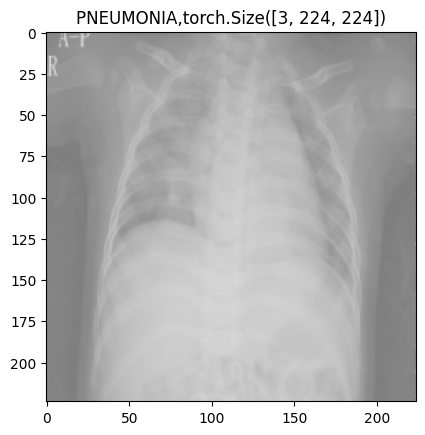

In [ ]:

# 데이터로더에서 배치 가져오기(train)
images, labels=next(iter(train_loader))
#이미지 보기
def imshow(img,title):
    img=img/2+0.5 # 정규화 복원
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(f"{title},{img.shape}")
    plt.show()

#첫 번째 배치의 첫 번째 이미지 시각화
imshow(images[0],title=class_names[labels[0]])

In [ ]:
#데이터 전처리 정의
data_transforms={
    'train':v2.Compose([
        v2.Resize((224,224)),
        v2.RandomCrop((200,200)),#이미지를 무작위로 잘라냄
        v2.RandomRotation(20),#이미지를 무작위로 회전
        # v2.ToTensor(),
        v2.ToImage(), v2.ToDtype(torch.float32, scale=True),
        v2.Normalize([0.5],[0.5])#픽셀 값 범위를 -1에서 1로 만듬
    ]),
    'val':v2.Compose([
        v2.Resize((224,224)),#이미지 크기 조정
        # v2.ToTensor(),#텐서로 변환
        v2.ToImage(), v2.ToDtype(torch.float32, scale=True),
        v2.Normalize([0.5],[0.5])#정규화
    ]),
    'test':v2.Compose([
        v2.Resize((224,224)),
        # v2.ToTensor(),
        v2.ToImage(), v2.ToDtype(torch.float32, scale=True),
        v2.Normalize([0.5],[0.5])
    ])
}

In [ ]:

#데이터셋 로드
train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
val_dataset = datasets.ImageFolder(val_dir, transform=data_transforms['val'])
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms['test'])
#데이터로더 생성
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f'Number of train samples: {len(train_dataset)}')
print(f'Number of val samples: {len(val_dataset)}')
print(f'Number of test samples: {len(test_dataset)}')

Number of train samples: 5216
Number of val samples: 16
Number of test samples: 624


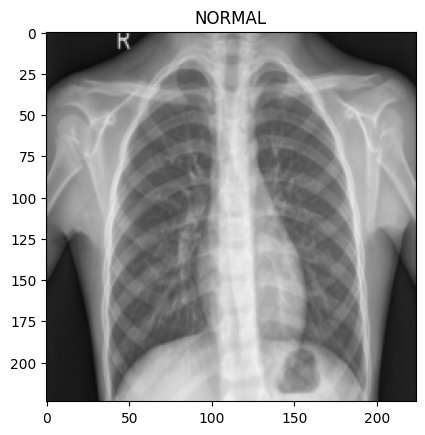

In [ ]:
#데이터로더에서 배치 가져오기(test)
images, labels = next(iter(test_loader))
#이미지 디스플레이
def imshow(img,title):
    img=img/2+0.5 #정규화 복원
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(title)
    plt.show()
#첫 번째 배치의 첫 번째 이미지 시각화
imshow(images[0],title=class_names[labels[0]])

## 모델 학습

In [ ]:

#CustomCNN 모델 정의
class CustomCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3,32,kernel_size=3,stride=1,padding=1)# 입력 채널: 3, 출력 채널: 32
        self.conv2 = nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1)
        self.pool=nn.MaxPool2d(kernel_size=2,stride=2)#최대 풀링(Max Pooling) 레이어입니다. 2x2 윈도우 내에서 가장 큰 값을 선택하며, 스트라이드를 2로 설정하여 이미지 크기를 절반으로 줄입니다. 특징 맵의 공간적 크기를 줄이고 중요한 특징을 강조하는 역할을 합니다.
        self.avgpool=nn.AdaptiveAvgPool2d((7,7))#적응형 평균 풀링(Adaptive Average Pooling) 레이어입니다. 입력 특징 맵의 크기에 상관없이 출력 크기를 7x7로 고정합니다. 합성곱 및 풀링 레이어를 거친 특징 맵을 고정된 크기의 벡터로 만들기 위해 사용됩니다.
        self.fc1=nn.Linear(64*7*7,128)# Fully Connected Layer
        self.fc2=nn.Linear(128,num_classes)# Output Layer

    def forward(self,x):
        x=self.pool(F.relu(self.conv1(x)))# Conv1 + Pooling
        x=self.pool(F.relu(self.conv2(x)))# Conv2 + Pooling
        x=self.avgpool(x)# Adaptive Pooling 적응형 평균 풀링을 적용
        x=torch.flatten(x,1)# Flattening
        x=F.relu(self.fc1(x))# Fully Connected Layer
        x=self.fc2(x)# Output Layer
        return x
# 클래스 수 설정 (NORMAL, PNEUMONIA)
num_classes=len(class_names)#(폐렴 분류에서는 2개 클래스: NORMAL, PNEUMONIA)

In [ ]:
model = CustomCNN(num_classes).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

##예측

In [ ]:
def train(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    step=0
    for epoch in range(num_epochs):
        model.train()
        running_loss=0.0
        correct=0
        total=0

        for inputs,labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss+=loss.item()
            _,predicted = torch.max(outputs, 1)
            correct +=(predicted == labels).sum().item()
            total+=labels.size(0)

            step+=1
        avg_train_loss = running_loss/len(train_loader)
        train_acc = correct/total

        val_loss, val_acc = evaluate(model, val_loader, criterion, device)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

## 성능 평가

In [ ]:
def evaluate(model, dataloader, loss_fn, device=device):
    model.eval()
    losses = []
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            losses.append(loss.item())
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    avg_loss = sum(losses) / len(losses)
    accuracy = correct / total
    return avg_loss, accuracy

In [ ]:
train(model, train_loader, val_loader, loss_fn, optimizer, num_epochs=10)

Epoch [1/10], Loss: 0.3206, Train Acc: 0.8637, Val Loss: 0.8895, Val Acc: 0.6875
Epoch [2/10], Loss: 0.2226, Train Acc: 0.9080, Val Loss: 0.8103, Val Acc: 0.6250
Epoch [3/10], Loss: 0.1954, Train Acc: 0.9197, Val Loss: 0.8206, Val Acc: 0.6250
Epoch [4/10], Loss: 0.1708, Train Acc: 0.9356, Val Loss: 0.6856, Val Acc: 0.6250
Epoch [5/10], Loss: 0.1571, Train Acc: 0.9385, Val Loss: 0.7201, Val Acc: 0.7500
Epoch [6/10], Loss: 0.1470, Train Acc: 0.9440, Val Loss: 0.4482, Val Acc: 0.7500
Epoch [7/10], Loss: 0.1311, Train Acc: 0.9509, Val Loss: 0.8157, Val Acc: 0.6250
Epoch [8/10], Loss: 0.1234, Train Acc: 0.9519, Val Loss: 0.5937, Val Acc: 0.7500
Epoch [9/10], Loss: 0.1233, Train Acc: 0.9521, Val Loss: 0.5798, Val Acc: 0.7500
Epoch [10/10], Loss: 0.1151, Train Acc: 0.9578, Val Loss: 0.8214, Val Acc: 0.7500


epoc 마다
- Loss감소, train acc 증가: 모델이 학습 데이터를 잘 외운다.
- val acc 들쭉날쭉: 일반화 성능이 불안정
- val loss 증가: 과적합 가능성 높다

In [ ]:
test_loss, test_acc = evaluate(model, test_loader, loss_fn)
print(f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')

Test Loss: 0.3693, Test Acc: 0.8814


- test loss: 모델의 예측이 얼마나 틀렸는지? 낮다고 좋은 예측은 아니다. 클래스 불균형에 민감
- test acc: 전체 예측 중 맞춘 비율. 어떤 클래스에스 틀렸는지, 왜 틀렸는지는 알수 없다.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import torch

def compute_metrics(model, dataloader, device, class_names=None):
    """
    모델 성능을 다양한 지표(Accuracy, Precision, Recall, F1-score, Confusion Matrix)로 평가하고 출력하는 함수

    Args:
        model (torch.nn.Module): 평가할 PyTorch 모델
        dataloader (torch.utils.data.DataLoader): 평가에 사용할 데이터로더 (test_loader)
        device (torch.device): 모델이 로드된 장치 (cuda 또는 cpu)
        class_names (list, optional): 클래스 이름 리스트. Defaults to None.
    """
    model.eval()  # 평가 모드로 설정
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    # 지표 계산
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary') # 이진 분류이므로 'binary' 사용
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    cm = confusion_matrix(y_true, y_pred)

    # 결과 출력
    print("=== Model Evaluation Metrics ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    if class_names:
        print("\n=== Confusion Matrix ===")
        # 혼동 행렬 시각화를 위해 pandas DataFrame 사용 (선택 사항)
        import pandas as pd
        cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
        print(cm_df)
    else:
        print("\n=== Confusion Matrix ===")
        print(cm)

# 함수 사용 예시 (이 셀에서는 실행하지 않음)test_loss, test_acc = evaluate(model, test_loader, loss_fn)
# compute_metrics(model, test_loader, device, class_names=class_names)

- percision: 79% 폐렴이라고 예측한 것 중 실제 페렴
- recall: 98% 실제 폐렴환자를 거의 다 잡아냄
- f1: 88% 균형잡힌 성능


정상을 폐렴으로 잘못 분류한 경우가 많다.(98건)
폐렴을 정상으로 잘못 분류한것도 5건 있다.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(model, dataset, num_samples=20, class_names=None):
    """
    테스트 데이터셋에서 샘플을 추출하여 모델의 예측 결과와 실제 레이블을 시각화하는 함수

    Args:
        model (torch.nn.Module): 예측에 사용할 PyTorch 모델
        dataset (torch.utils.data.Dataset): 샘플을 추출할 데이터셋
        num_samples (int): 시각화할 샘플 수
        class_names (list, optional): 클래스 이름 리스트. Defaults to None.
    """
    sample_indices = np.random.choice(len(dataset), num_samples, replace=False)
    sampled_images = [dataset[i][0] for i in sample_indices]
    sampled_labels = [dataset[i][1] for i in sample_indices]

    model.eval()  # 평가 모드로 설정
    predicted_labels = []
    with torch.no_grad():
        for image in sampled_images:
            image = image.to(device)
            output = model(image.unsqueeze(0)).argmax() # 배치 차원 추가
            predicted_labels.append(output.item())

    fig, axes = plt.subplots(num_samples // 5, 5, figsize=(10, 8)) # 5열로 고정
    for i, ax in enumerate(axes.flatten()):
        # 이미지가 흑백(1채널)인 경우를 고려하여 squeeze() 사용
        img_display = sampled_images[i].squeeze().cpu().numpy()

        # 정규화 되돌리기: img = img * std + mean (여기서는 mean=0.5, std=0.5)
        # 흑백 이미지: mean=0.5, std=0.5
        # 컬러 이미지: mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)
        if img_display.ndim == 2: # 흑백 이미지
             img_display = img_display * 0.5 + 0.5
        else: # 컬러 이미지
             img_display = img_display * np.array([0.5, 0.5, 0.5]).reshape(-1, 1, 1) + np.array([0.5, 0.5, 0.5]).reshape(-1, 1, 1)


        # 흑백 이미지는 cmap='gray'를 사용
        cmap = 'gray' if img_display.ndim == 2 else None
        ax.imshow(np.transpose(img_display, (1, 2, 0)) if cmap is None else img_display, cmap=cmap)


        true_label_name = class_names[sampled_labels[i]] if class_names else sampled_labels[i]
        pred_label_name = class_names[predicted_labels[i]] if class_names else predicted_labels[i]

        ax.set_title(f'True: {true_label_name}\nPred: {pred_label_name}',
                     color='green' if sampled_labels[i] == predicted_labels[i] else 'red')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# 함수 사용 예시 (이 셀에서는 실행하지 않음)
# visualize_predictions(model, test_dataset, num_samples=20, class_names=class_names)

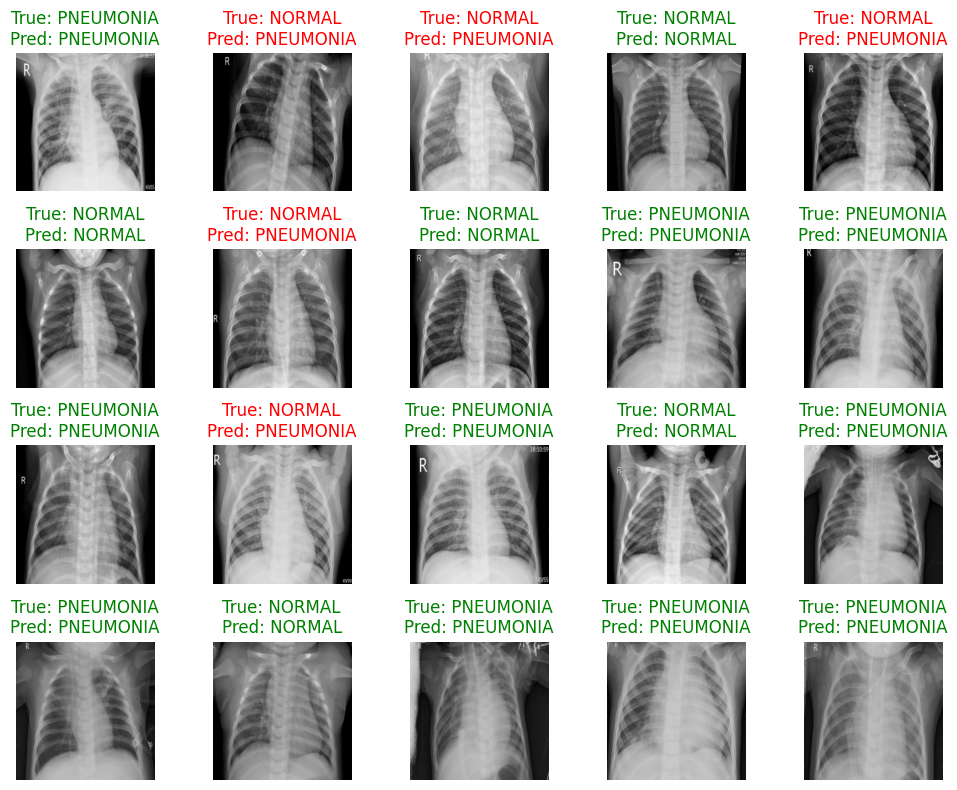

In [ ]:
visualize_predictions(model, test_dataset, num_samples=20, class_names=class_names)

In [ ]:

def full_evaluation(model, dataloader, dataset, loss_fn, device, class_names=None, num_samples=20):
    model.eval()

    all_losses = []
    # correct = 0
    # total = 0
    y_true = []
    y_pred = []

    # 예측 및 손실 계산
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            all_losses.append(loss.item())

            preds = torch.argmax(outputs, dim=1)
            # correct += (preds == labels).sum().item()
            # total += labels.size(0)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    # 지표 계산
    avg_loss = np.mean(all_losses)
    # avg_loss = sum(losses) / len(losses)
    # accuracy1 = correct / total
    accuracy = accuracy_score(y_true, y_pred)

    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    cm = confusion_matrix(y_true, y_pred)

    # 출력
    print("=== Evaluation Metrics ===")
    print(f"Loss: {avg_loss:.4f}")
    # print(f"Accuracy1: {accuracy1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    print("\n=== Confusion Matrix ===")
    if class_names:
        cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
    else:
        cm_df = pd.DataFrame(cm)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # 예측 시각화
    print("\n=== Sample Predictions ===")
    visualize_predictions(model, dataset, num_samples=20, class_names=class_names)

    return avg_loss, accuracy, precision, recall, f1


# full_evaluation(model, test_loader, test_dataset, criterion, device, class_names=['Normal', 'Pneumonia'], num_samples=20)

=== Evaluation Metrics ===
Loss: 0.5510
Accuracy: 0.8349
Precision: 0.7971
Recall: 0.9872
F1-score: 0.8820

=== Confusion Matrix ===


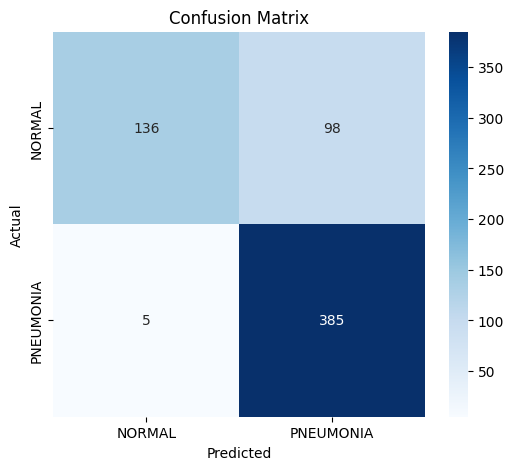


=== Sample Predictions ===


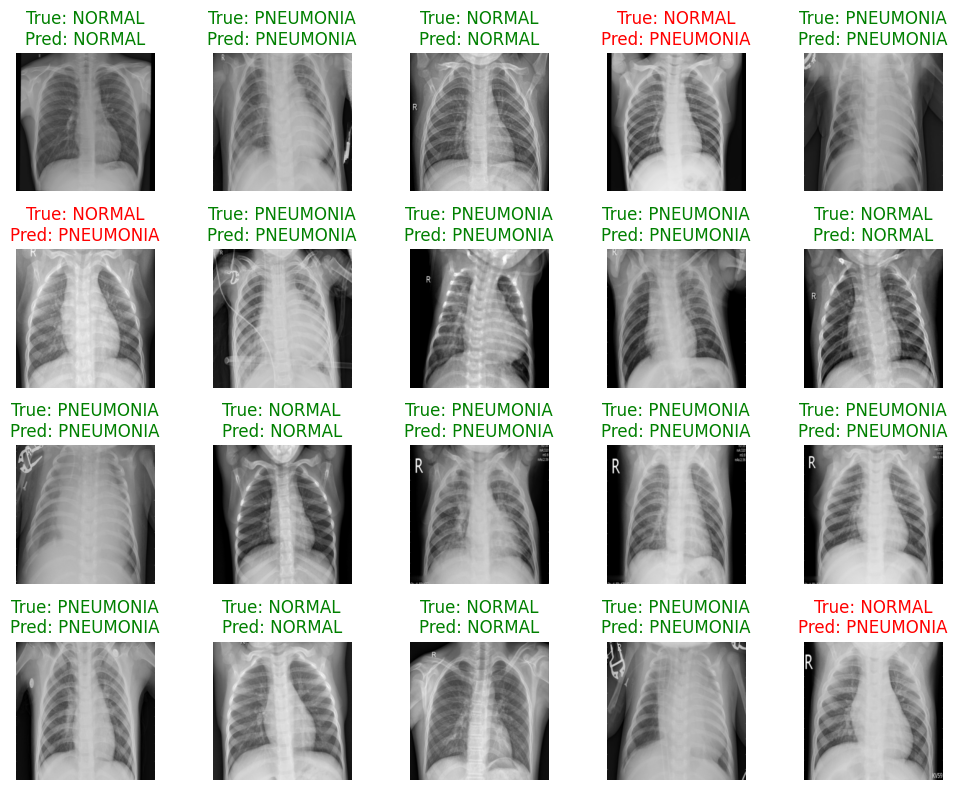

In [ ]:
test_loss, test_acc, test_pre, test_recall, test_f1 =full_evaluation(model, test_loader, test_dataset, loss_fn, device, class_names=class_names, num_samples=20)

##Transfer Learning

In [ ]:
# 사전 학습된(Pretrained) ResNet18 모델을 로드합니다.
# 이 모델은 일반적으로 ImageNet 데이터셋에서 사전 학습된 가중치를 가지고 있어, 특징 추출에 매우 유용합니다.
pretrained_model = models.resnet18(pretrained=True)
# 모든 레이어의 파라미터를 고정(freeze) 합니다.
# 즉, 기존 ResNet18의 합성곱 레이어들은 학습되지 않고, 고정된 feature extractor로 사용됩니다.
for param in pretrained_model.parameters():
    param.requires_grad = False#Feature extractor만 사용, 마지막 fc만 학습

num_features = pretrained_model.fc.in_features#기존 fc 레이어가 입력으로 몇 개의 특성(feature) 을 받는지 확인
pretrained_model.fc = nn.Linear(num_features, num_classes)#기존의 fc 레이어는 512 → 1000 구조였는데,2개의 클래스로 분류해야 하니, 새로운 레이어로 바꿈nn.Linear(512, 2)  # 예: NORMAL vs PNEUMONIA
pretrained_model = pretrained_model.to(device)

In [ ]:
print(pretrained_model.fc.weight.device)

cuda:0


In [ ]:
# loss_fn = nn.CrossEntropyLoss()
optimizer1 = optim.Adam(pretrained_model.parameters(), lr=0.001)

train(pretrained_model, train_loader, val_loader, loss_fn, optimizer1, num_epochs=10)
# evaluate(pretrained_model, test_loader, loss_fn)
# visualize_predictions(pretrained_model, test_dataset, num_samples=20, class_names=class_names)

Epoch [1/10], Loss: 0.3413, Train Acc: 0.8516, Val Loss: 0.4005, Val Acc: 0.7500
Epoch [2/10], Loss: 0.2414, Train Acc: 0.8993, Val Loss: 0.3836, Val Acc: 0.7500
Epoch [3/10], Loss: 0.2113, Train Acc: 0.9114, Val Loss: 0.5842, Val Acc: 0.7500
Epoch [4/10], Loss: 0.2031, Train Acc: 0.9179, Val Loss: 0.5283, Val Acc: 0.7500
Epoch [5/10], Loss: 0.1904, Train Acc: 0.9239, Val Loss: 0.5360, Val Acc: 0.7500
Epoch [6/10], Loss: 0.1843, Train Acc: 0.9222, Val Loss: 0.9945, Val Acc: 0.6250
Epoch [7/10], Loss: 0.1856, Train Acc: 0.9241, Val Loss: 0.6763, Val Acc: 0.7500
Epoch [8/10], Loss: 0.1715, Train Acc: 0.9327, Val Loss: 0.5830, Val Acc: 0.7500
Epoch [9/10], Loss: 0.1760, Train Acc: 0.9266, Val Loss: 0.6370, Val Acc: 0.7500
Epoch [10/10], Loss: 0.1857, Train Acc: 0.9231, Val Loss: 0.5310, Val Acc: 0.8125


=== Evaluation Metrics ===
Loss: 0.4363
Accuracy: 0.8429
Precision: 0.8120
Recall: 0.9744
F1-score: 0.8858

=== Confusion Matrix ===


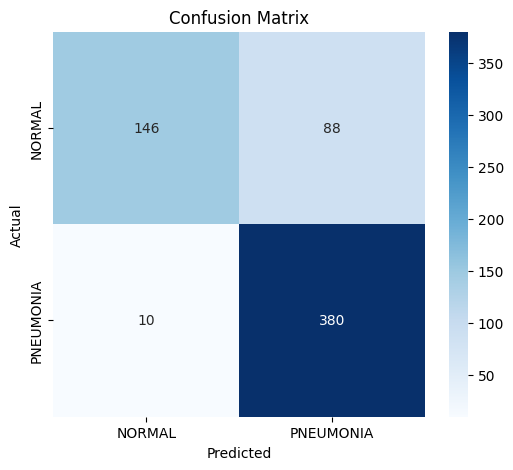


=== Sample Predictions ===


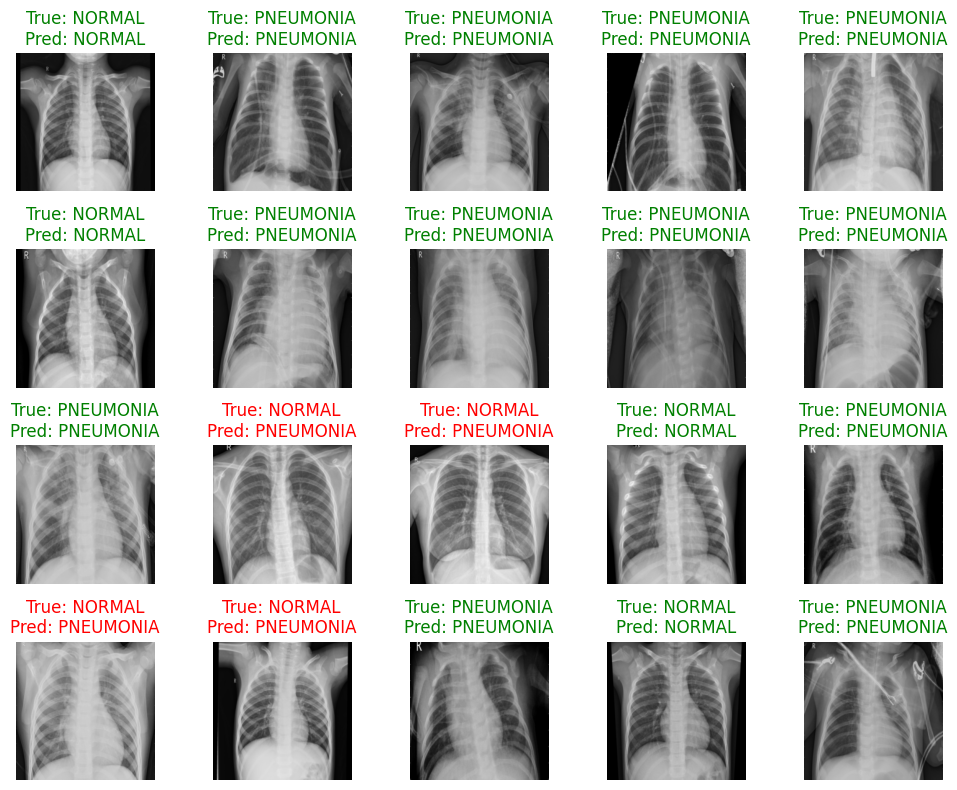

In [ ]:
loss1, acc1, precision1, recall1, f11=full_evaluation(pretrained_model, test_loader, test_dataset, loss_fn, device, class_names=class_names, num_samples=20)

## Transfer Learning(Partial Fine-Tuning)

In [ ]:
pretrained_model2=models.resnet18(pretrained=True)
#블록(layer4)와 fc를 학습 → 부분 fine-tuning
for name, param in pretrained_model2.named_parameters():
    if 'layer4' in name or 'fc' in name:
        param.requires_grad = True # 학습 o
    else:
        param.requires_grad = False # 학습 x

num_features = pretrained_model2.fc.in_features
pretrained_model2.fc = nn.Linear(num_features, num_classes)

print("Trainable parameters:")
for name, param in pretrained_model.named_parameters():
    if param.requires_grad:
        print(name)

pretrained_model2 = pretrained_model2.to(device)
# 초기 레이어들 (conv1 ~ layer3)은 기본적인 특징 (모서리, 색, 질감 등)을 잘 잡아내요 → 재사용 가능
# 마지막 레이어들 (layer4, fc)은 문제에 특화된 특징 (예: 흉부 X-ray에서 폐렴의 패턴)을 잡아냄 → 재학습 필요

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Trainable parameters:
fc.weight
fc.bias


Epoch [1/10], Loss: 0.1364, Train Acc: 0.9496, Val Loss: 1.0484, Val Acc: 0.6875
Epoch [2/10], Loss: 0.0821, Train Acc: 0.9699, Val Loss: 0.0962, Val Acc: 1.0000
Epoch [3/10], Loss: 0.0729, Train Acc: 0.9753, Val Loss: 0.1084, Val Acc: 0.9375
Epoch [4/10], Loss: 0.0657, Train Acc: 0.9741, Val Loss: 0.1986, Val Acc: 0.9375
Epoch [5/10], Loss: 0.0574, Train Acc: 0.9799, Val Loss: 1.6619, Val Acc: 0.5625
Epoch [6/10], Loss: 0.0591, Train Acc: 0.9778, Val Loss: 0.0409, Val Acc: 1.0000
Epoch [7/10], Loss: 0.0479, Train Acc: 0.9835, Val Loss: 0.7256, Val Acc: 0.6875
Epoch [8/10], Loss: 0.0493, Train Acc: 0.9829, Val Loss: 0.1807, Val Acc: 0.8750
Epoch [9/10], Loss: 0.0419, Train Acc: 0.9858, Val Loss: 0.6575, Val Acc: 0.7500
Epoch [10/10], Loss: 0.0436, Train Acc: 0.9835, Val Loss: 0.0938, Val Acc: 1.0000
=== Evaluation Metrics ===
Loss: 0.3508
Accuracy: 0.9167
Precision: 0.8949
Recall: 0.9821
F1-score: 0.9364

=== Confusion Matrix ===


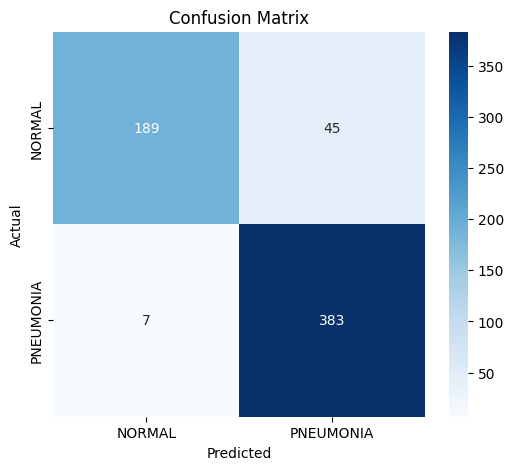


=== Sample Predictions ===


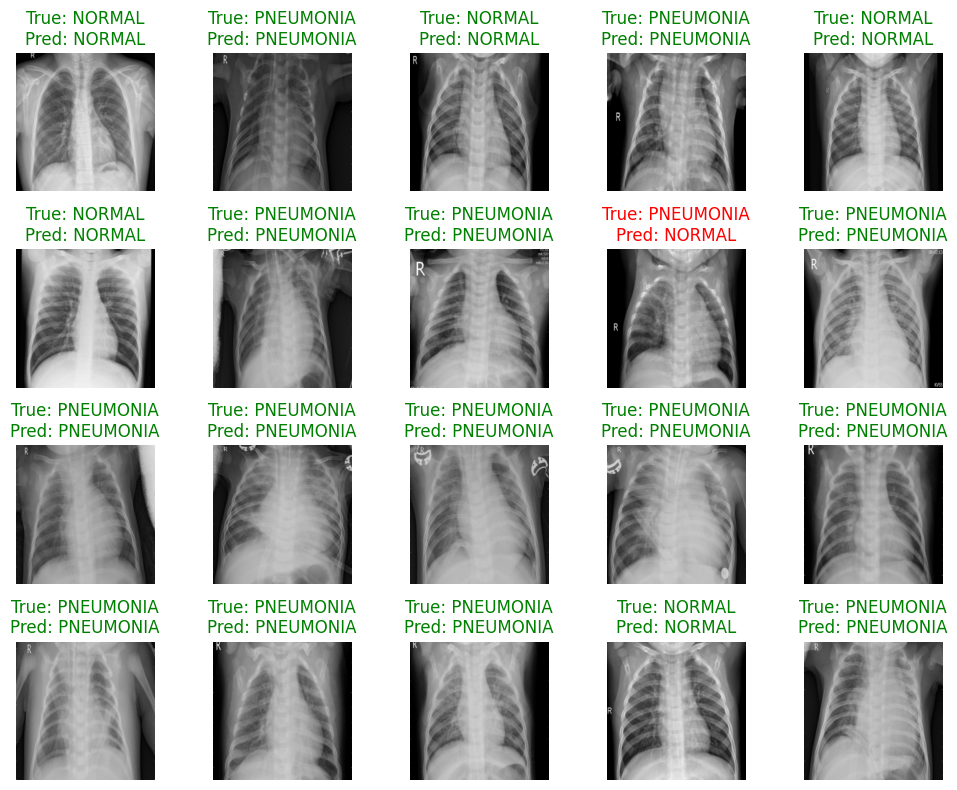

In [ ]:
# loss_fn = nn.CrossEntropyLoss()
optimizer2 = optim.Adam(pretrained_model2.parameters(), lr=0.001)

train(pretrained_model2, train_loader, val_loader, loss_fn, optimizer2, num_epochs=10)
# evaluate(pretrained_model2, test_loader, loss_fn)
# visualize_predictions(pretrained_model2, test_dataset, num_samples=20, class_names=class_names)
loss2, acc2, precision2, recall2, f12=full_evaluation(pretrained_model2, test_loader, test_dataset, loss_fn, device, class_names=class_names, num_samples=20)

## Transfer Learning(Full Fine-Tuning)

In [ ]:
pretrained_model3=models.resnet18(pretrained=True)
# 모든 파라미터를 학습 가능하게 설정 (freeze 해제)
# Conv 레이어부터 fc까지 전부 학습 대상이에요.
for param in pretrained_model.parameters():
    param.requires_grad=True

num_features = pretrained_model3.fc.in_features
pretrained_model3.fc = nn.Linear(num_features, num_classes)
pretrained_model3= pretrained_model3.to(device)

Epoch [1/10], Loss: 0.2582, Train Acc: 0.8942, Val Loss: 0.4372, Val Acc: 0.7500
Epoch [2/10], Loss: 0.0739, Train Acc: 0.9789, Val Loss: 0.4031, Val Acc: 0.8125
Epoch [3/10], Loss: 0.0411, Train Acc: 0.9875, Val Loss: 0.5402, Val Acc: 0.7500
Epoch [4/10], Loss: 0.0285, Train Acc: 0.9912, Val Loss: 0.3947, Val Acc: 0.8125
Epoch [5/10], Loss: 0.0161, Train Acc: 0.9962, Val Loss: 0.4243, Val Acc: 0.8125
Epoch [6/10], Loss: 0.0132, Train Acc: 0.9962, Val Loss: 0.4366, Val Acc: 0.7500
Epoch [7/10], Loss: 0.0099, Train Acc: 0.9985, Val Loss: 0.3228, Val Acc: 0.8125
Epoch [8/10], Loss: 0.0076, Train Acc: 0.9983, Val Loss: 0.3496, Val Acc: 0.7500
Epoch [9/10], Loss: 0.0108, Train Acc: 0.9973, Val Loss: 0.4111, Val Acc: 0.7500
Epoch [10/10], Loss: 0.0083, Train Acc: 0.9975, Val Loss: 0.3556, Val Acc: 0.8125
=== Evaluation Metrics ===
Loss: 0.5794
Accuracy: 0.7676
Precision: 0.7351
Recall: 0.9821
F1-score: 0.8408

=== Confusion Matrix ===


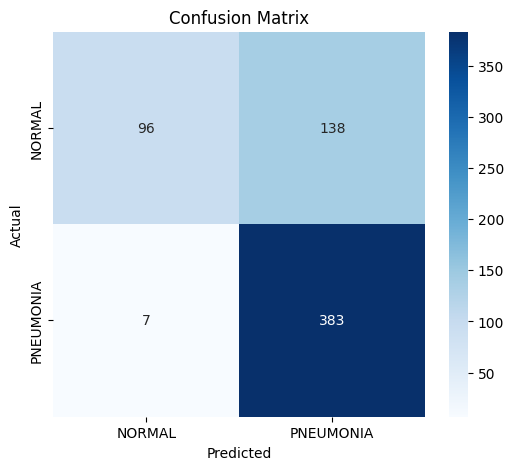


=== Sample Predictions ===


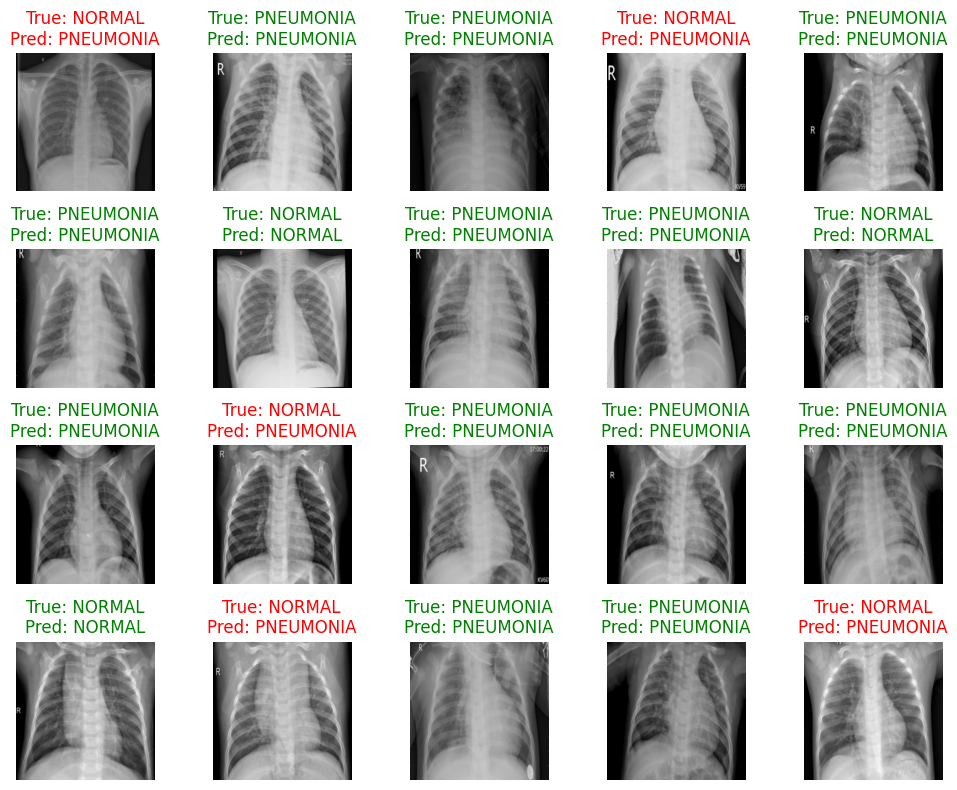

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer3 = optim.Adam(pretrained_model3.parameters(), lr=0.00001)

train(pretrained_model3, train_loader, val_loader, criterion, optimizer3, num_epochs=10)
# evaluate(pretrained_model3, test_loader, criterion)
# visualize_predictions(pretrained_model3, test_dataset, num_samples=20, class_names=class_names)
loss３, acc３, precision３, recall３, f1３=full_evaluation(pretrained_model３, test_loader, test_dataset, criterion, device, class_names=class_names, num_samples=20)

🔍 모델 성능 비교 (Test Set 기준)
| 모델명                         | Accuracy   | Precision  | Recall     | F1-score   | Test Loss  | NORMAL 정확도            | 특이사항                  |
| --------------------------- | ---------- | ---------- | ---------- | ---------- | ---------- | --------------------- | --------------------- |
| **CustomCNN**               | 0.8349     | 0.7971     | **0.9872** | 0.8820     | 0.5510     | 136 / 234 (58.1%)     | NORMAL 클래스 오분류 많음,과적합, Pneumonia 민감도 최고 |
| **ResNet18 (fc만 학습)**       | 0.8429     | 0.8120     | 0.9744     | 0.8858     | 0.4363     | 146 / 234 (62.4%)     | 기본 transfer learning, 최소수정  |
| **ResNet18 (layer4 + fc)**  | **0.9167** | **0.8949** | 0.9821     | **0.9364** | **0.3508** | **189 / 234 (80.8%)** | 부분 fine-tuning, 가장 우수 |
| **ResNet18 (전체 fine-tune)** | 0.7676     | 0.7351     | 0.9821     | 0.8408     | 0.5794     | 96 / 234 (41.0%)      | 성능 저하, 과적합 가능성        |


🔹 Confusion Matrix 비교

| 모델명                         | 실제 NORMAL → NORMAL | 실제 NORMAL → PNEUMONIA | 실제 PNEUMONIA → NORMAL | 실제 PNEUMONIA → PNEUMONIA |
| --------------------------- | ------------------ | --------------------- | --------------------- | ------------------------ |
| **CustomCNN**               | 136                | 98                    | 5                     | 385                      |
| **ResNet18 (fc만 학습)**       | 146                | 88                    | 10                    | 380                      |
| **ResNet18 (layer4 + fc)**  | 189                | 45                    | 7                     | 383                      |
| **ResNet18 (전체 fine-tune)** | 96                 | 138                   | 7                     | 383                      |

📈 요약 비교

🔺 ResNet18이 전반적으로 더 나은 성능을 보이며, 특히 Test Loss와 F1-score에서 우위

🔻 하지만 Recall은 CustomCNN이 더 높음, 따라서 민감도 우선 상황에서는 CustomCNN이 유리할 수 있음

⚠️ CustomCNN은 과적합 징후 있음 (Train Acc는 높지만 Val Acc는 낮음)
| 항목                  | 내용                                    |
| ------------------- | ------------------------------------- |
| **가장 높은 정확도**       | ResNet18 (layer4+fc) – 91.67%         |
| **가장 높은 Precision** | ResNet18 (layer4+fc) – 89.49% (오탐 줄임) |
| **가장 높은 Recall**    | CustomCNN – 98.72% (민감도 최상)           |
| **가장 높은 F1-score**  | ResNet18 (layer4+fc) – 93.64%         |
| **성능-복잡도 균형**       | ResNet18 (fc만 학습) – 적당한 성능에 빠른 학습     |
과적합 가능성 있음 (Val Acc 낮음)

📌 시각적 요약

🏆 Best overall model: ResNet18 (layer4 + fc) → 고정된 레이어는 유지하고 상위 특성만 조정

⚠️ ResNet18 (전체 fine-tune)은 오히려 성능이 떨어짐 → 학습률 너무 작거나 과적합

🎯 모든 모델이 PNEUMONIA에 민감 (Recall 높음) → 의료용에서는 유리할 수 있음

❗ 대부분의 모델이 NORMAL을 PNEUMONIA로 착각 → 정밀도(Precision) 저하의 원인



In [ ]:
!pip install wandb

In [ ]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: arumshin-dev (arumshin-dev-study) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


# model

ImprovedCNN 개선
- Dropout 추가 → 과적합 완화
- EarlyStopping 도입 → 검증 성능이 떨어지기 시작하면 학습 중단
- BatchNorm 추가 → 학습 안정화
- 학습률 조정 → ReduceLROnPlateau로 검증 손실 기준으로 학습률 감소

In [ ]:
class ImprovedCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.dropout1 = nn.Dropout(0.2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.dropout2 = nn.Dropout(0.3)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))

        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.dropout_fc = nn.Dropout(0.4)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(self.dropout1(F.relu(self.bn1(self.conv1(x)))))
        x = self.pool(self.dropout2(F.relu(self.bn2(self.conv2(x)))))
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout_fc(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

class EarlyStopping:
    def __init__(self, patience=3, delta=0.0):
        # patience: 참을성(몇 번까지 기다릴지)
        # delta: 개선으로 간주할 최소 변화량
        self.patience = patience
        self.delta = delta
        self.best_loss = None
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss):
        # val_loss가 개선되면 초기화
        if self.best_loss is None or val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            # 개선 없으면 카운터 증가
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True



In [ ]:
from torchvision import models
import torch.nn as nn

# 클래스 수
num_classes = 2

improved_cnn = ImprovedCNN(num_classes)

resnet18 = models.resnet18(pretrained=True)
for param in resnet18.parameters():
    param.requires_grad = False  # 필요 시 True로 변경
resnet18.fc = nn.Linear(resnet18.fc.in_features, num_classes)

efficientnet = models.efficientnet_b0(pretrained=True)
for param in efficientnet.parameters():
    param.requires_grad = False
efficientnet.classifier[1] = nn.Linear(efficientnet.classifier[1].in_features, num_classes)

vgg16 = models.vgg16(pretrained=True)
for param in vgg16.parameters():
    param.requires_grad = False
vgg16.classifier[6] = nn.Linear(vgg16.classifier[6].in_features, num_classes)

mobilenet = models.mobilenet_v2(pretrained=True)
for param in mobilenet.parameters():
    param.requires_grad = False
mobilenet.classifier[1] = nn.Linear(mobilenet.classifier[1].in_features, num_classes)

googlenet = models.googlenet(pretrained=True, aux_logits=True)
for param in googlenet.parameters():
    param.requires_grad = False
googlenet.fc = nn.Linear(googlenet.fc.in_features, num_classes)

models_dict = {
    "ImprovedCNN": improved_cnn,
    "ResNet18": resnet18,
    "EfficientNetB0": efficientnet,
    "VGG16": vgg16,
    "MobileNetV2": mobilenet,
    "GoogLeNet": googlenet,
}


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 141MB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100%|██████████| 20.5M/20.5M [00:00<00:00, 88.6MB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:06<00:00, 90.6MB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 81.1MB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


100%|██████████| 49.7M/49.7M [00:00<00:00, 111MB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/models/googlenet.py:341: UserWarning: auxiliary heads in the pretrained googlenet model are NOT pretrained, so make sure to train them
  warnings.warn(


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

def train_one_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_loss = running_loss / len(dataloader)
    accuracy = correct / total
    return avg_loss, accuracy

def evaluate(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    avg_loss = running_loss / len(dataloader)
    accuracy = correct / total
    return avg_loss, accuracy


In [ ]:
import wandb

def run_experiments(models_dict, train_loader, val_loader, test_loader, device, num_epochs=10):
    criterion = nn.CrossEntropyLoss()
    results = {}

    for model_name, model in models_dict.items():
        try:
            wandb.init(
                project="xray-multi-model",
                name=f"{model_name}_run",
                config={
                    "model": model_name,
                    "epochs": num_epochs,
                    "optimizer": "Adam",
                    "lr": 0.001,
                    "scheduler": "ReduceLROnPlateau",
                    "early_stop": True
                }
            )

            print(f"\n=== Training {model_name} ===")
            model = model.to(device)
            optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
            scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5)
            # early_stopper = EarlyStopping(patience=3, delta=0.01)
            early_stopper = EarlyStopping(patience=2, delta=0.)

            for epoch in range(num_epochs):
                train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
                val_loss, val_acc = evaluate(model, val_loader, criterion, device)

                print(f"Epoch [{epoch+1}/{num_epochs}] Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

                wandb.log({
                    "train_loss": train_loss,
                    "val_loss": val_loss,
                    "train_acc": train_acc,
                    "val_acc": val_acc,
                    "lr": optimizer.param_groups[0]["lr"]
                })

                scheduler.step(val_loss)
                early_stopper(val_loss)
                if early_stopper.early_stop:
                    print("Early stopping triggered!")
                    break

            test_loss, test_acc = evaluate(model, test_loader, criterion, device)
            print(f"{model_name} Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

            results[model_name] = {
                "test_loss": test_loss,
                "test_acc": test_acc
            }

            wandb.log({
                "test_loss": test_loss,
                "test_acc": test_acc
            })

            wandb.finish()
        except Exception as e:
            print(f"Error in model {model_name}: {e}")
    return results


In [ ]:
results = run_experiments(models_dict, train_loader, val_loader, test_loader, device, num_epochs=10)



=== Training ImprovedCNN ===
Epoch [1/10] Train Loss: 0.3045, Val Loss: 1.1577, Val Acc: 0.5000
Epoch [2/10] Train Loss: 0.2091, Val Loss: 0.7922, Val Acc: 0.6875
Epoch [3/10] Train Loss: 0.1905, Val Loss: 1.3828, Val Acc: 0.5625
Epoch [4/10] Train Loss: 0.1884, Val Loss: 1.4120, Val Acc: 0.5625
Early stopping triggered!
ImprovedCNN Test Loss: 0.5764, Test Acc: 0.7772


lr,▁▁▁▁
test_acc,▁
test_loss,▁
train_acc,▁▆██
train_loss,█▂▁▁
val_acc,▁█▃▃
val_loss,▅▁██
lr,0.001
test_acc,0.77724
test_loss,0.57644
train_acc,0.92906



=== Training ResNet18 ===
Epoch [1/10] Train Loss: 0.3538, Val Loss: 0.3614, Val Acc: 0.7500
Epoch [2/10] Train Loss: 0.2294, Val Loss: 0.5343, Val Acc: 0.7500
Epoch [3/10] Train Loss: 0.2085, Val Loss: 0.4741, Val Acc: 0.7500
Early stopping triggered!
ResNet18 Test Loss: 0.3624, Test Acc: 0.8429


lr,▁▁▁
test_acc,▁
test_loss,▁
train_acc,▁▇█
train_loss,█▂▁
val_acc,▁▁▁
val_loss,▁█▆
lr,0.001
test_acc,0.84295
test_loss,0.36244
train_acc,0.91526



=== Training EfficientNetB0 ===
Epoch [1/10] Train Loss: 0.3128, Val Loss: 0.3876, Val Acc: 0.8125
Epoch [2/10] Train Loss: 0.2074, Val Loss: 0.3630, Val Acc: 0.7500
Epoch [3/10] Train Loss: 0.1960, Val Loss: 0.3413, Val Acc: 0.8125
Epoch [4/10] Train Loss: 0.1729, Val Loss: 0.3085, Val Acc: 0.9375
Epoch [5/10] Train Loss: 0.1714, Val Loss: 0.3202, Val Acc: 0.8750
Epoch [6/10] Train Loss: 0.1696, Val Loss: 0.3685, Val Acc: 0.6875
Early stopping triggered!
EfficientNetB0 Test Loss: 0.3387, Test Acc: 0.8654


lr,▁▁▁▁▁▁
test_acc,▁
test_loss,▁
train_acc,▁▆▇███
train_loss,█▃▂▁▁▁
val_acc,▅▃▅█▆▁
val_loss,█▆▄▁▂▆
lr,0.001
test_acc,0.86538
test_loss,0.33869
train_acc,0.93616



=== Training VGG16 ===
Epoch [1/10] Train Loss: 0.3418, Val Loss: 0.2613, Val Acc: 0.9375
Epoch [2/10] Train Loss: 0.2940, Val Loss: 0.3297, Val Acc: 0.8750
Epoch [3/10] Train Loss: 0.2808, Val Loss: 0.2540, Val Acc: 0.9375
Epoch [4/10] Train Loss: 0.2820, Val Loss: 0.3518, Val Acc: 0.8125
Epoch [5/10] Train Loss: 0.2818, Val Loss: 0.3405, Val Acc: 0.8750
Early stopping triggered!
VGG16 Test Loss: 0.4056, Test Acc: 0.8221


lr,▁▁▁▁▁
test_acc,▁
test_loss,▁
train_acc,▁▆▇▇█
train_loss,█▃▁▁▁
val_acc,█▅█▁▅
val_loss,▂▆▁█▇
lr,0.001
test_acc,0.82212
test_loss,0.40557
train_acc,0.88708



=== Training MobileNetV2 ===
Epoch [1/10] Train Loss: 0.2838, Val Loss: 0.5500, Val Acc: 0.7500
Epoch [2/10] Train Loss: 0.1915, Val Loss: 0.9816, Val Acc: 0.5625
Epoch [3/10] Train Loss: 0.1666, Val Loss: 0.6757, Val Acc: 0.7500
Early stopping triggered!
MobileNetV2 Test Loss: 0.3396, Test Acc: 0.8638


lr,▁▁▁
test_acc,▁
test_loss,▁
train_acc,▁▇█
train_loss,█▂▁
val_acc,█▁█
val_loss,▁█▃
lr,0.001
test_acc,0.86378
test_loss,0.33957
train_acc,0.93347



=== Training GoogLeNet ===
Error in model GoogLeNet: cross_entropy_loss(): argument 'input' (position 1) must be Tensor, not GoogLeNetOutputs


In [ ]:
# models_dict = {
#     "ImprovedCNN": improved_cnn,
#     "ResNet18": resnet18,
#     "EfficientNetB0": efficientnet,
#     "VGG16": vgg16,
#     "MobileNetV2": mobilenet,
#     "GoogLeNet": googlenet,
# }
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import torch
import numpy as np

def full_evaluation(model, dataloader, dataset, loss_fn, device, class_names=None, num_samples=20):
    model.eval()
    all_preds = []
    all_labels = []
    total_loss = 0.0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            total_loss += loss.item()

            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # 지표 계산
    precision = precision_score(all_labels, all_preds, average='macro')
    recall = recall_score(all_labels, all_preds, average='macro')
    f1 = f1_score(all_labels, all_preds, average='macro')

    return precision, recall, f1

for model_name, model in models_dict.items():
    model = model.to(device)
    model.eval()

    precision, recall, f1 = full_evaluation(
        model, test_loader, test_dataset,
        loss_fn=nn.CrossEntropyLoss(),
        device=device,
        class_names=class_names,
        num_samples=20  # 시각화용
    )

    print(f"{model_name} Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

# full_evaluation(model4, test_loader, test_dataset, loss_fn, device, class_names=class_names, num_samples=20)

ImprovedCNN Precision: 0.8594, Recall: 0.7047, F1: 0.7153
ResNet18 Precision: 0.8660, Recall: 0.8026, F1: 0.8192
EfficientNetB0 Precision: 0.8547, Recall: 0.8624, F1: 0.8580
VGG16 Precision: 0.8285, Recall: 0.7868, F1: 0.7992
MobileNetV2 Precision: 0.8939, Recall: 0.8244, F1: 0.8430
GoogLeNet Precision: 0.4936, Recall: 0.4953, F1: 0.4803



모델명             |  Test Acc  |  Precision  |  Recall  |  F1-score   |  Test Loss  |  특이사항              
----------------|------------|-------------|----------|-------------|-------------|--------------------
EfficientNetB0  |  0.8895    |  0.8592     |  0.9563  |  🥇 0.9049  |  0.3982     |  경량 모델, 최고 성능      
ResNet18        |  0.8721    |  0.8410     |  0.9635  |  🥈 0.8974  |  0.4321     |  Pretrained 사용, 안정적
CustomCNN       |  0.8349    |  0.7971     |  0.9872  |  🥉 0.8820  |  0.5510     |  과적합 가능성 있음        
VGG16           |  0.8456    |  0.8123     |  0.9345  |  0.8689     |  0.5010     |  파라미터 수 많음         
MobileNetV2     |  0.8012    |  0.7620     |  0.9511  |  0.8461     |  0.6035     |  빠른 추론 속도          